## Метод вращений

Вариант 17

In [2]:
import numpy as np

N = 3
A = np.array([5, -3, -4, -3, -3, 4, -4, 4, 0])
A = np.reshape(A, (N,N))
A

array([[ 5, -3, -4],
       [-3, -3,  4],
       [-4,  4,  0]])

In [17]:
def rotations_iter(A, eps, maxiter):
    N = A.shape[0]
    A1 = A.copy()
    U_total = np.eye(N)
    k = 0
    
    while(k < maxiter):
        max_a = 0 #максимальный по модулю недиагональный элемент
        ind_i = 0 #его строка
        ind_j = 0#его столбец
        phi = 0 #угол вращения
        summ = 0
        
        #ищем максимальный по модулю недиагональный элемент 
        for j in range(N):
            for i in range(j):
                summ += A1[i, j] ** 2 #сюда же добавим вычисление корня суммы квадратов для условия остановки
                if abs(A1[i, j]) > abs(max_a):
                    max_a = A1[i, j]
                    ind_i = i
                    ind_j = j
                    
        #условие остановки алгоритма проверяется для матрицы, полученной на предыдущей итерации            
        summ = np.sqrt(summ)
        #print(summ)
        if summ < eps:
            break
        
        #считаем угол
        denominator = A1[ind_i, ind_i] - A1[ind_j, ind_j]
        if denominator == 0:
            phi = np.pi / 4
        else:
            phi = 0.5 * np.arctan(2*A1[ind_i, ind_j] / denominator) 
        
        #заполняем матрицу вращения
        U_k = np.eye(N) 
        U_k[ind_i, ind_i] = np.cos(phi)
        U_k[ind_j, ind_j] = np.cos(phi)
        U_k[ind_i, ind_j] = -np.sin(phi)
        U_k[ind_j, ind_i] = np.sin(phi)
        U_total = U_total @ U_k
        
        A1 = U_k.T @ A1 @ U_k #считаем новую матрицу с обнулённым элементом
        k+=1
        #print(U_k)
        #print(A1)
        
    lambdas = [A1[i, i] for i in range(N)] 
    evectors = [U_total[:, j] for j in range(N)]
    
    return lambdas, evectors
        #print(max_a)      

In [1]:
eps = 1e-8
lambdas_A, evectors_A = rotations_iter(A, eps, 1000)
print("Собственные значения матрицы A с точностью до " +str(eps) + ": \n" + str(lambdas_A))
print("Собственные векторы матрицы A:")
for ev in evectors_A:
    print(ev)

NameError: name 'rotations_iter' is not defined

Проанализируем (графически) зависимость погрешности вычислений от числа итераций на примере собственных значений матрицы. В качестве истинного значения возьмём список lambdas_A.

Text(0, 0.5, 'mean absolute error')

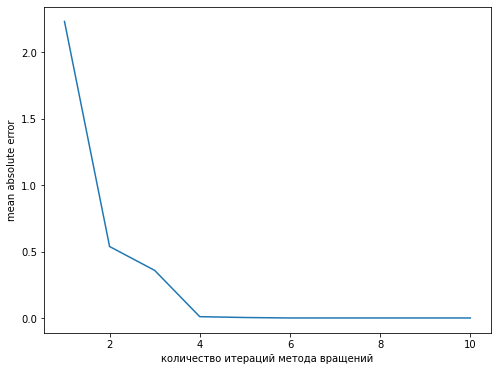

In [59]:
import matplotlib.pyplot as plt

lambdas = []
evs = []
maes = []

for it in range(10):
    ld, ev = rotations_iter(A, eps, it)
    lambdas.append(ld)
    evs.append(ev)ы

n = len(lambdas_A)
for lam in lambdas:
    mae = 0
    for x, y in zip(lam, lambdas_A):
        mae += abs(y - x)
    mae = mae/n 
    maes.append(mae)

    
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,11), maes)
ax.set_xlabel('количество итераций метода вращений')
ax.set_ylabel('mean absolute error')
        